<a href="https://colab.research.google.com/github/memonji/CLProject_A-distant-reading-analysis-of-American-literary-movements/blob/main/%5B3%5D%20text%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#FOR LISTS OF URLS

import urllib.request
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('all')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]  

True

In [ ]:
#FOR UNIFIED LISTS OF URLS (unified_processed_texts)



def find_beginning_and_end(raw):
    '''
    This function serves to find the text within the raw data provided by Project Gutenberg
    '''
    end_regex = 'end of th(is|e) project gutenberg ebook'
    end_position = re.search(end_regex, raw.lower())
    if end_position:
        text = raw[:end_position.start()]
    else:
        text = raw
    return text

def preprocessing(text):
    nltk.download("stopwords")
    stop_words = set(nltk.corpus.stopwords.words("english"))

    lower_text = text.lower()
    #punc_chars = string.punctuation + '"'
    #no_punct_corpus = lower_text.translate(str.maketrans("", "", punc_chars))
    no_punct_corpus = lower_text.translate(str.maketrans ("", "", string.punctuation))
    no_number_corpus = re.sub(r'\d+', '', no_punct_corpus)
    no_number_corpus = str(no_number_corpus)
    tokenized_corpus = nltk.word_tokenize(no_number_corpus)
    lemmatizer = WordNetLemmatizer()
    first_lemmatized_corpus = " ".join(lemmatizer.lemmatize(word) for word in tokenized_corpus)
    lemmatized_corpus = nltk.word_tokenize(first_lemmatized_corpus)
    filtered_tokens = [word for word in lemmatized_corpus if word not in stop_words]
    return filtered_tokens


def process_url(url):
    raw = urllib.request.urlopen(url).read().decode().strip()
    text = find_beginning_and_end(raw)
    processed_text = preprocessing(text)
    return processed_text

urls = [
    "http://www.gutenberg.org/files/2147/2147-0.txt",
    "http://www.gutenberg.org/files/1342/1342-0.txt",
    "http://www.gutenberg.org/files/98/98-0.txt"
]

#for url in urls:
#    processed_text = process_url(url)

processed_texts = []
for url in urls:
    processed_text = process_url(url)
    processed_texts.append(processed_text)
    print(len(processed_text))

unified_processed_text = [word for sublist in processed_texts for word in sublist]

print(len(unified_processed_text))

#(I've just put the print(len()) function so to be sure the code it's working)

#FOR LISTS OF URLS (single pre-processed texts)



def find_beginning_and_end(raw):
    '''
    This function serves to find the text within the raw data provided by Project Gutenberg
    '''
    end_regex = 'end of th(is|e) project gutenberg ebook'
    end_position = re.search(end_regex, raw.lower())
    if end_position:
        text = raw[:end_position.start()]
    else:
        text = raw
    return text

def preprocessing(text):
    nltk.download("stopwords")
    stop_words = set(nltk.corpus.stopwords.words("english"))

    lower_text = text.lower()
    #punc_chars = string.punctuation + '"'
    #no_punct_corpus = lower_text.translate(str.maketrans("", "", punc_chars))
    no_punct_corpus = lower_text.translate(str.maketrans ("", "", string.punctuation))
    no_number_corpus = re.sub(r'\d+', '', no_punct_corpus)
    no_number_corpus = str(no_number_corpus)
    tokenized_corpus = nltk.word_tokenize(no_number_corpus)
    lemmatizer = WordNetLemmatizer()
    first_lemmatized_corpus = " ".join(lemmatizer.lemmatize(word) for word in tokenized_corpus)
    lemmatized_corpus = nltk.word_tokenize(first_lemmatized_corpus)
    filtered_tokens = [word for word in lemmatized_corpus if word not in stop_words]
    return filtered_tokens


def process_url(url):
    raw = urllib.request.urlopen(url).read().decode().strip()
    text = find_beginning_and_end(raw)
    processed_text = preprocessing(text)
    return processed_text

urls = [
    "http://www.gutenberg.org/files/2147/2147-0.txt",
    "http://www.gutenberg.org/files/1342/1342-0.txt",
    "http://www.gutenberg.org/files/98/98-0.txt"
]

for url in urls:
    processed_text = process_url(url)
    print("Processed text from URL:", url)
    print(processed_text[:300])
    print("\n")

    
#FOR SINGLE ITEMS (some statements are not used but better to download them before, we'll need them at some point

#by single item



poeUrl = "http://www.gutenberg.org/files/2147/2147-0.txt"
poeString = urllib.request.urlopen(poeUrl).read().decode().strip()

def find_beginning_and_end(raw):
    '''
    This function serves to find the text within the raw data provided by Project Gutenberg
    '''

    start_regex = '\*\*\*\s?START OF TH(IS|E) PROJECT GUTENBERG EBOOK.*\*\*\*'
    draft_start_position = re.search(start_regex, raw)
    beginning = draft_start_position.end()

    end_regex = 'end of th(is|e) project gutenberg ebook'
    end_position = re.search(end_regex, raw.lower())

    text = raw[beginning:end_position.start()]

    return text

def preprocessing(text):
    lower_text = text.lower()
    no_punct_corpus = lower_text.translate(str.maketrans("", "", string.punctuation))
    no_number_corpus = re.sub(r'\d+', '', no_punct_corpus)
    no_number_corpus = str(no_number_corpus)
    tokenized_corpus = nltk.word_tokenize(no_number_corpus)
    lemmatizer = WordNetLemmatizer()
    lemmatized_corpus = " ".join(lemmatizer.lemmatize(word) for word in tokenized_corpus)
    return lemmatized_corpus

raw_text = poeString
preprocessed_text = nltk.word_tokenize(preprocessing(find_beginning_and_end(raw_text)))
print(preprocessed_text)





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


46625


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


64584


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


72493
183702


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Processed text from URL: http://www.gutenberg.org/files/2147/2147-0.txt
['\ufeffthe', 'project', 'gutenberg', 'ebook', 'work', 'edgar', 'allan', 'poe', 'volume', 'edgar', 'allan', 'poe', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'state', 'part', 'world', 'cost', 'almost', 'restriction', 'whatsoever', 'may', 'copy', 'give', 'away', 'reuse', 'term', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'wwwgutenbergorg', 'located', 'united', 'state', 'check', 'law', 'country', 'located', 'using', 'ebook', 'title', 'work', 'edgar', 'allan', 'poe', 'volume', 'author', 'edgar', 'allan', 'poe', 'release', 'date', 'may', 'ebook', 'recently', 'updated', 'january', 'language', 'english', 'character', 'set', 'encoding', 'utf', 'produced', 'david', 'widger', 'carlo', 'traverso', 'start', 'project', 'gutenberg', 'ebook', 'work', 'edgar', 'allan', 'poe', 'vol', 'work', 'edgar', 'allan', 'poe', 'edgar', 'allan', 'poe', 'raven', 'edition', 'content', 'preface', 'life', 'poe', 'death

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Processed text from URL: http://www.gutenberg.org/files/1342/1342-0.txt
['\ufeffthe', 'project', 'gutenberg', 'ebook', 'pride', 'prejudice', 'jane', 'austen', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'state', 'part', 'world', 'cost', 'almost', 'restriction', 'whatsoever', 'may', 'copy', 'give', 'away', 'reuse', 'term', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'wwwgutenbergorg', 'located', 'united', 'state', 'check', 'law', 'country', 'located', 'using', 'ebook', 'title', 'pride', 'prejudice', 'author', 'jane', 'austen', 'release', 'date', 'november', 'ebook', 'language', 'english', 'produced', 'chuck', 'greif', 'online', 'distributed', 'proofreading', 'team', 'httpwwwpgdpnet', 'file', 'wa', 'produced', 'image', 'available', 'internet', 'archive', 'start', 'project', 'gutenberg', 'ebook', 'pride', 'prejudice', 'illustration', 'george', 'allen', 'publisher', 'charing', 'cross', 'road', 'london', 'ruskin', 'house', 'illustration', 'reading', 'jane', '’', 'l

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Processed text from URL: http://www.gutenberg.org/files/98/98-0.txt
['\ufeffthe', 'project', 'gutenberg', 'ebook', 'tale', 'two', 'city', 'charles', 'dickens', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'state', 'part', 'world', 'cost', 'almost', 'restriction', 'whatsoever', 'may', 'copy', 'give', 'away', 'reuse', 'term', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'wwwgutenbergorg', 'located', 'united', 'state', 'check', 'law', 'country', 'located', 'using', 'ebook', 'title', 'tale', 'two', 'city', 'story', 'french', 'revolution', 'author', 'charles', 'dickens', 'release', 'date', 'january', 'ebook', 'recently', 'updated', 'december', 'language', 'english', 'character', 'set', 'encoding', 'utf', 'produced', 'judith', 'bos', 'david', 'widger', 'start', 'project', 'gutenberg', 'ebook', 'tale', 'two', 'city', 'tale', 'two', 'city', 'story', 'french', 'revolution', 'charles', 'dickens', 'content', 'book', 'firstrecalled', 'life', 'chapter', 'period', 'chapter', 

In [ ]:
#this calculated the frequency for the pre_processed text (which is the text from the chosen url)
preprocessed_textWordTokensLowercase = [word for word in preprocessed_text if word[0].isalpha()] 
preprocessed_textWordFrequencies = nltk.FreqDist(preprocessed_textWordTokensLowercase)

In [ ]:
#this prints the results of the frequency equation
print("number of tokens: ", len(preprocessed_textWordTokensLowercase))
print("type/token ratio: ", len(preprocessed_textWordFrequencies)/len(preprocessed_textWordTokensLowercase))

number of tokens:  90513
type/token ratio:  0.1018196281197176


In [ ]:
preprocessed_textWordFrequencies.tabulate(20) #This shows the results of the most used words, but with the stopwords included

  the    of     a   and    to    in    it     i    wa  that    is  with    at which  this    by  have   not   for   his 
 7036  4218  2773  2360  2251  1909  1417  1273  1040  1018   831   750   748   649   641   638   601   583   573   557 


In [ ]:
stopwords = nltk.corpus.stopwords.words("english")  #this list the English stopwords
print(sorted(stopwords)) # sort them alphabetically before printing

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

In [ ]:
print("sample words: ", preprocessed_textWordTokensLowercase) #this lists the words that are targeted, without the stopwords
print("sample words not in stopwords list: ", [word for word in preprocessed_textWordTokensLowercase if not word in stopwords])

sample words:  ['the', 'work', 'of', 'edgar', 'allan', 'poe', 'by', 'edgar', 'allan', 'poe', 'the', 'raven', 'edition', 'content', 'preface', 'life', 'of', 'poe', 'death', 'of', 'poe', 'the', 'unparalleled', 'adventure', 'of', 'one', 'han', 'pfaall', 'the', 'goldbug', 'four', 'beast', 'in', 'one—the', 'homocameleopard', 'the', 'murder', 'in', 'the', 'rue', 'morgue', 'the', 'mystery', 'of', 'marie', 'roget', 'the', 'balloonhoax', 'm', 'found', 'in', 'a', 'bottle', 'the', 'oval', 'portrait', 'edgar', 'allan', 'poe', 'an', 'appreciation', 'caught', 'from', 'some', 'unhappy', 'master', 'whom', 'unmerciful', 'disaster', 'followed', 'fast', 'and', 'followed', 'faster', 'till', 'his', 'song', 'one', 'burden', 'bore—', 'till', 'the', 'dirge', 'of', 'his', 'hope', 'that', 'melancholy', 'burden', 'bore', 'of', 'never—never', 'more', 'this', 'stanza', 'from', 'the', 'raven', 'wa', 'recommended', 'by', 'james', 'russell', 'lowell', 'a', 'an', 'inscription', 'upon', 'the', 'baltimore', 'monument', 

In [ ]:
preprocessed_textWordTokensLowercase  = [word for word in preprocessed_textWordTokensLowercase 
#This lists the most used words that are 
#not in the stopwords list
        if word[0].isalpha() and word not in stopwords]
preprocessed_textWordFrequencies = nltk.FreqDist(preprocessed_textWordTokensLowercase)
preprocessed_textWordFrequencies.tabulate(20) # show a sample of the top 

     wa    upon     one   would   could      ha    time       u   found     say   great    much   first     two    body     day     may however    made  little 
   1040     390     297     234     232     192     169     159     155     134     130     127     126     119     114     112     109     109     108     106 


In [ ]:

#Some movements have only one author as a canon within the texts we extracted from PG. Therefore, it could not be relevant. But still, we've put it in the corpus for some further evidences.

#American Literature Movements
#[American Romanticism and Naturalism: Thoreau/Melville (Romanticism), Poe/Hawthorne/Melville/Emerson/Dickinson (Dark Romanticism), Jacobs/Douglass (Slave Narratives), Twain (Regionalism), Thoreau/Whitman (Transcendentalism), James/Howells/Crane/Twain (Realism), Bryant/Longfellow (Fireside Poets), Crane/London/Norris (Naturalism); Modernism: Faulkner/Hemingway (Modernism), Hughes/Hurston/Fitzgerald/Hemingway (Harlem Renaissance), Vonnegut/Dick (Postmodernism); Lost Generation: Hemingway/Fitzgerald; Modern American Prose: Lee; Modern American Drama: Miller; Confessional Poetry: Plath]

melville_urls = [
    "https://www.gutenberg.org/cache/epub/2489/pg2489.txt", 
    "https://www.gutenberg.org/cache/epub/2694/pg2694.txt", 
    "https://www.gutenberg.org/cache/epub/4045/pg4045.txt", 
    "https://www.gutenberg.org/cache/epub/10712/pg10712.txt", 
    'https://www.gutenberg.org/cache/epub/11231/pg11231.txt', 
    'https://www.gutenberg.org/cache/epub/12384/pg12384.txt', 
    'https://www.gutenberg.org/cache/epub/12384/pg12384.txt', 
    'https://www.gutenberg.org/cache/epub/34970/pg34970.txt',
    'https://www.gutenberg.org/cache/epub/21816/pg21816.txt',
    'https://www.gutenberg.org/cache/epub/15859/pg15859.txt',
    'https://www.gutenberg.org/cache/epub/15422/pg15422.txt',
    'https://www.gutenberg.org/cache/epub/13721/pg13721.txt',
    'https://www.gutenberg.org/cache/epub/13720/pg13720.txt'
]

# Melville list: Moby Dick / I and my chimney / Omoo: Adventures in the South Seas / White-Jacket / Bartleby, The Scrivener / Battle-Pieces and Aspects of the War / Pierre; or The Ambiguities / The Confidence-Man / The Piazza Tales / Israel Potter / Mardi: and A Voyage Thither

thoreau_urls = [   
    "https://www.gutenberg.org/cache/epub/4066/pg4066.txt",   
    "https://www.gutenberg.org/cache/epub/4232/pg4232.txt",   
    "https://www.gutenberg.org/cache/epub/9846/pg9846.txt",   
    "https://www.gutenberg.org/cache/epub/34392/pg34392.txt",   
    "https://www.gutenberg.org/cache/epub/34990/pg34990.txt",   
    "https://www.gutenberg.org/cache/epub/42500/pg42500.txt",   
    "https://www.gutenberg.org/cache/epub/60951/pg60951.txt",   
    "https://www.gutenberg.org/cache/epub/2567/pg2567.txt",   
    "https://www.gutenberg.org/cache/epub/63459/pg.txt" 
]

poe_urls = ["https://www.gutenberg.org/cache/epub/2148/pg2148.txt",
            'https://www.gutenberg.org/cache/epub/2147/pg2147.txt',
            'https://www.gutenberg.org/cache/epub/17192/pg17192.txt',
            'https://www.gutenberg.org/cache/epub/2151/pg2151.txt',
            'https://www.gutenberg.org/files/2149/2149-0.txt',
            'https://www.gutenberg.org/files/2150/2150-0.txt',
            'https://www.gutenberg.org/files/32037/32037-0.txt',
            'https://www.gutenberg.org/cache/epub/2151/pg2151.txt']

hawthorne_urls = ['https://www.gutenberg.org/cache/epub/976/pg976.txt',
                'https://www.gutenberg.org/files/1916/1916-0.txt',
                'https://www.gutenberg.org/cache/epub/2081/pg2081.txt',
                'https://www.gutenberg.org/files/2181/2181-0.txt',
                'https://www.gutenberg.org/files/2182/2182-0.txt',
                'https://www.gutenberg.org/cache/epub/7085/pg7085.txt',
                'https://www.gutenberg.org/cache/epub/7119/pg7119.txt',
                'https://www.gutenberg.org/files/7183/7183-0.txt',
                'https://www.gutenberg.org/cache/epub/7372/pg7372.txt',
                'https://www.gutenberg.org/cache/epub/7878/pg7878.txt',
                'https://www.gutenberg.org/cache/epub/7881/pg7881.txt',
                'https://www.gutenberg.org/cache/epub/8088/pg8088.txt',
                'https://www.gutenberg.org/cache/epub/8089/pg8089.txt',
                'https://www.gutenberg.org/cache/epub/8090/pg8090.txt',
                'https://www.gutenberg.org/files/8091/8091-0.txt',
                'https://www.gutenberg.org/cache/epub/8429/pg8429.txt',
                'https://www.gutenberg.org/cache/epub/9201/pg9201.txt',
                'https://www.gutenberg.org/cache/epub/9202/pg9202.txt',
                'https://www.gutenberg.org/cache/epub/9203/pg9203.txt',
                'https://www.gutenberg.org/files/9204/9204-0.txt',
                'https://www.gutenberg.org/cache/epub/9205/pg9205.txt',
                'https://www.gutenberg.org/cache/epub/9206/pg9206.txt',
                'https://www.gutenberg.org/cache/epub/9207/pg9207.txt',
                'https://www.gutenberg.org/cache/epub/9208/pg9208.txt',
                'https://www.gutenberg.org/cache/epub/9209/pg9209.txt',
                'https://www.gutenberg.org/cache/epub/9210/pg9210.txt',
                'https://www.gutenberg.org/files/9211/9211-0.txt',
                'https://www.gutenberg.org/cache/epub/9212/pg9212.txt',
                'https://www.gutenberg.org/files/9213/9213-0.txt',
                'https://www.gutenberg.org/files/9214/9214-0.txt',
                'https://www.gutenberg.org/files/9215/9215-0.txt',
                'https://www.gutenberg.org/cache/epub/9216/pg9216.txt',
                'https://www.gutenberg.org/files/9217/9217-0.txt',
                'https://www.gutenberg.org/cache/epub/9218/pg9218.txt',
                'https://www.gutenberg.org/cache/epub/9219/pg9219.txt',
                'https://www.gutenberg.org/files/9220/9220-0.txt',
                'https://www.gutenberg.org/cache/epub/512/pg512.txt',
                'https://www.gutenberg.org/cache/epub/9222/pg9222.txt',
                'https://www.gutenberg.org/cache/epub/9236/pg9236.txt',
                'https://www.gutenberg.org/cache/epub/9237/pg9237.txt',
                'https://www.gutenberg.org/cache/epub/9238/pg9238.txt',
                'https://www.gutenberg.org/cache/epub/9239/pg9239.txt',
                'https://www.gutenberg.org/cache/epub/9240/pg9240.txt',
                'https://www.gutenberg.org/cache/epub/9241/pg9241.txt',
                'https://www.gutenberg.org/cache/epub/9242/pg9242.txt',
                'https://www.gutenberg.org/cache/epub/9243/pg9243.txt',
                'https://www.gutenberg.org/cache/epub/9244/pg9244.txt',
                'https://www.gutenberg.org/cache/epub/9246/pg9246.txt',
                'https://www.gutenberg.org/files/9247/9247-0.txt',
                'https://www.gutenberg.org/files/9248/9248-0.txt',
                'https://www.gutenberg.org/cache/epub/9249/pg9249.txt',
                'https://www.gutenberg.org/cache/epub/9250/pg9250.txt',
                'https://www.gutenberg.org/files/9251/9251-0.txt',
                'https://www.gutenberg.org/cache/epub/9252/pg9252.txt',
                'https://www.gutenberg.org/cache/epub/9253/pg9253.txt',
                'https://www.gutenberg.org/files/9255/9255-0.txt',
                'https://www.gutenberg.org/files/9256/9256-0.txt',
                'https://www.gutenberg.org/files/9257/9257-0.txt',
                'https://www.gutenberg.org/files/9258/9258-0.txt',
                'https://www.gutenberg.org/files/15697/15697-0.txt',
                'https://www.gutenberg.org/files/64944/64944-0.txt',
                'https://www.gutenberg.org/files/77/77-0.txt',
                'https://www.gutenberg.org/cache/epub/41368/pg41368.txt',
                'https://www.gutenberg.org/cache/epub/33/pg33.txt',
                'https://www.gutenberg.org/cache/epub/30376/pg30376.txt',
                'https://www.gutenberg.org/cache/epub/41309/pg41309.txt'
                ]
                
# Hawthorne Nathaniel List: Tanglewood Tales / The Great Stone Face, and Other Tales of the White Mountains / The Blithedale Romance / The Marble Faun; Or, The Romance of Monte Beni - Volume 1 / The Marble Faun; Or, The Romance of Monte Beni - Volume 2 / Fanshawe / The Dolliver Romance / Doctor Grimshawe's Secret — a Romance / Septimius Felton, or, the Elixir of Life / Passages from the English Notebooks, Complete; Passages from the French and Italian Notebooks, Complete; Passages from the American Notebooks, Volume 1; Passages from the American Notebooks, Volume 2. / Our Old Home: A Series of English Sketches / Sketches and Studies / The Ancestral Footstep (fragment) Outlines of an English Romance / various pieces from Twice Told Tales / A Rill from the Town Pump / A Select Party / various pieces from The Snow Image and Other Twice-Told Tales / A Bell's Biography / various pieces from The Doliver Romance and Other Pieces: Tales and Sketches / A Book of Autographs / various pieces from A Wonder-book for girls and boys / "Browne's Folly" (From: "The Doliver Romance and Other Pieces: Tales and Sketches") / True Stories of History and Biography / In colonial days / The House of the Seven Gables / Mosses from an old manse / Love Letters of Nathaniel Hawthorne, Volume 2 (of 2) / The Scarlet Letter / The snow-image: a childish miracle / Love Letters of Nathaniel Hawthorne, Volume 1 (of 2)

dickinson_urls = ['https://www.gutenberg.org/cache/epub/12242/pg12242.txt']

# Dickinson List: Poems: Three Series, Complete

emerson_urls = ['https://www.gutenberg.org/cache/epub/12843/pg12843.txt', 
                'https://www.gutenberg.org/cache/epub/16643/pg16643.txt',
                'https://www.gutenberg.org/cache/epub/69258/pg69258.txt'
                'https://www.gutenberg.org/cache/epub/6312/pg6312.txt',
                'https://www.gutenberg.org/cache/epub/2945/pg2945.txt']
                
# Emerson, Ralph Waldo List: Poems Household Edition / Society and solitude: Twelve chapters / Representative Men: Seven Lectures / Essays by Ralph Waldo Emerson / Essays — Second Series

james_urls = ['https://www.gutenberg.org/cache/epub/69629/pg69629.txt',
            'https://www.gutenberg.org/cache/epub/209/pg209.txt',
            'https://www.gutenberg.org/cache/epub/432/pg432.txt',
            'https://www.gutenberg.org/cache/epub/1093/pg1093.txt',
            'https://www.gutenberg.org/cache/epub/1190/pg1190.txt',
            'https://www.gutenberg.org/cache/epub/1195/pg1195.txt',
            'https://www.gutenberg.org/cache/epub/2366/pg2366.txt',
            'https://www.gutenberg.org/cache/epub/2425/pg2425.txt',
            'https://www.gutenberg.org/cache/epub/2426/pg2426.txt',
            'https://www.gutenberg.org/cache/epub/2460/pg2460.txt',
            'https://www.gutenberg.org/cache/epub/2534/pg2534.txt',
            'https://www.gutenberg.org/cache/epub/4264/pg4264.txt',
            'https://www.gutenberg.org/cache/epub/7118/pg7118.txt',
            'https://www.gutenberg.org/cache/epub/8080/pg8080.txt',
            'https://www.gutenberg.org/cache/epub/8081/pg8081.txt',
            'https://www.gutenberg.org/cache/epub/19718/pg19718.txt',
            'https://www.gutenberg.org/cache/epub/19717/pg19717.txt',
            'https://www.gutenberg.org/cache/epub/20085/pg20085.txt',
            'https://www.gutenberg.org/cache/epub/25500/pg25500.txt',
            'https://www.gutenberg.org/cache/epub/26115/pg26115.txt',
            'https://www.gutenberg.org/cache/epub/28004/pg28004.txt',
            'https://www.gutenberg.org/cache/epub/29452/pg29452.txt',
            'https://www.gutenberg.org/cache/epub/30059/pg30059.txt',
            'https://www.gutenberg.org/cache/epub/32649/pg32649.txt',
            'https://www.gutenberg.org/cache/epub/32939/pg32939.txt',
            'https://www.gutenberg.org/cache/epub/33325/pg33325.txt',
            'https://www.gutenberg.org/cache/epub/37424/pg37424.txt',
            'https://www.gutenberg.org/cache/epub/37425/pg37425.txt',
            'https://www.gutenberg.org/cache/epub/38424/pg38424.txt',
            'https://www.gutenberg.org/cache/epub/55078/pg55078.txt',
            'https://www.gutenberg.org/cache/epub/68340/pg68340.txt',
            'https://www.gutenberg.org/cache/epub/68717/pg68717.txt',
            'https://www.gutenberg.org/cache/epub/68961/pg68961.txt',
            'https://www.gutenberg.org/cache/epub/69628/pg69628.txt',
            'https://www.gutenberg.org/cache/epub/179/pg179.txt',
            ]
            
# Henry James List: The Princess Casamassima (Volume 2 of 2) by Henry James / The Turn of the Screw / The Ambassadors / The beast in the jungle / The jolly corner / Glasses / The Beldonald Holbein / A bundle of letters / The diary of a man of fifty / The madonna of the future / Eugene Pickering / The golden bowl / What Maise knew / A passionate pilgrim / Louisa Pallant / The bostonians vlII / The bostonians v.1 / The tragic muse / A London life and others / A small boy and others / A little tour in France / The wings of the Dove v.I and II / The middle years / The sacred fount / The spoils of poynton / Views and reviews / Within the rim and other essays / Notes of a son and a brother / The birthplace / A landspace painter / The American scene / Portraits of places / The princess Casamassima / The Europeans

howell_urls = ['https://www.gutenberg.org/cache/epub/7359/pg7359.txt',
                'https://www.gutenberg.org/cache/epub/4646/pg4646.txt',
                'https://www.gutenberg.org/cache/epub/4600/pg4600.txt',
                'https://www.gutenberg.org/cache/epub/3406/pg3406.txt',
                'https://www.gutenberg.org/cache/epub/3405/pg3405.txt',
                'https://www.gutenberg.org/cache/epub/3388/pg3388.txt',
                'https://www.gutenberg.org/cache/epub/3376/pg3376.txt',
                'https://www.gutenberg.org/cache/epub/3375/pg3375.txt',
                'https://www.gutenberg.org/cache/epub/3365/pg3365.txt',
                'https://www.gutenberg.org/cache/epub/2506/pg2506.txt',
                'https://www.gutenberg.org/cache/epub/728/pg728.txt',
                'https://www.gutenberg.org/cache/epub/66257/pg66257.txt',
                'https://www.gutenberg.org/cache/epub/47060/pg47060.txt',
                'https://www.gutenberg.org/cache/epub/43469/pg43469.txt',
                'https://www.gutenberg.org/cache/epub/33608/pg33608.txt',
                'https://www.gutenberg.org/cache/epub/30108/pg30108.txt',
                'https://www.gutenberg.org/cache/epub/29993/pg29993.txt',
                'https://www.gutenberg.org/cache/epub/28763/pg28763.txt',
                'https://www.gutenberg.org/cache/epub/28305/pg28305.txt',
                'https://www.gutenberg.org/cache/epub/27880/pg27880.txt',
                'https://www.gutenberg.org/cache/epub/23030/pg23030.txt',
                'https://www.gutenberg.org/cache/epub/22519/pg22519.txt',
                'https://www.gutenberg.org/cache/epub/22297/pg22297.txt',
                'https://www.gutenberg.org/cache/epub/22219/pg22219.txt',
                'https://www.gutenberg.org/cache/epub/20403/pg20403.txt',
                'https://www.gutenberg.org/cache/epub/20225/pg20225.txt',
                'https://www.gutenberg.org/cache/epub/18605/pg18605.txt',
                'https://www.gutenberg.org/cache/epub/18565/pg18565.txt',
                'https://www.gutenberg.org/cache/epub/18555/pg18555.txt',
                'https://www.gutenberg.org/cache/epub/154/pg154.txt',
                'https://www.gutenberg.org/cache/epub/723/pg723.txt',
                'https://www.gutenberg.org/cache/epub/66584/pg66584.txt'
                ]

#Howell William Dean List: ndian Summer/Their silver wedding journey/A hazard of new fortunes/Ragged Lady part1,2/The man of letters as a man of business/The landlord at Lion's head vol 1,2/Their wedding journey/The Sleeping Car, A farce/Emil Zola/Impressions and experiences/Years of my youth/A counterfeir presentment and the parlour car/Bride roses/The quality of mercy/Poems, Imaginary Interviews/A likely story/Evening dress/Buying a horse/Christmas every day and other stories/The coast of bohemia/The flight of Pony Baker and A boy's town story/A fearful responsibility and other stories/The story of a play and A novel/A pair of patient lovers/A little Swiss Sojourn/A chance acquaintance/The rise of Silas Lapham/Henry James Jr; the World of Chance

crane_urls = ["https://www.gutenberg.org/cache/epub/43706/pg43706.txt",
                "https://www.gutenberg.org/cache/epub/39644/pg39644.txt",
                "https://www.gutenberg.org/cache/epub/33579/pg33579.txt",
                "https://www.gutenberg.org/cache/epub/31488/pg31488.txt",
                'https://www.gutenberg.org/cache/epub/31189/pg31189.txt',
                'https://www.gutenberg.org/cache/epub/19593/pg19593.txt',
                'https://www.gutenberg.org/cache/epub/9870/pg9870.txt',
                'https://www.gutenberg.org/cache/epub/7239/pg7239.txt',
                'https://www.gutenberg.org/cache/epub/2364/pg2364.txt',
                'https://www.gutenberg.org/cache/epub/463/pg463.txt',
                'https://www.gutenberg.org/cache/epub/447/pg447.txt',
                'https://www.gutenberg.org/cache/epub/45524/pg45524.txt'
                ]

# Stephen Crane list: Wounds in the rain and War stories/Whilomville Stories/Last words/The Little Regiment And Other Episodes of the American Civil War/The Monster and Other Stories/The Monster/The Blue Hotel/His New Mittens/The third violet/War is kind/Men, Women and boats/Active Service/The red badge of courage. An Episode of the American Civil War/Maggie: A girl of the street/The open boat and other stories

twain_urls = ['https://www.gutenberg.org/cache/epub/1086/pg1086.txt',
            'https://www.gutenberg.org/cache/epub/1213/pg1213.txt',
            'https://www.gutenberg.org/cache/epub/3176/pg3176.txt',
            'https://www.gutenberg.org/cache/epub/3177/pg3177.txt',
            'https://www.gutenberg.org/cache/epub/2572/pg2572.txt',
            'https://www.gutenberg.org/cache/epub/3179/pg3179.txt',
            'https://www.gutenberg.org/cache/epub/5782/pg5782.txt',
            'https://www.gutenberg.org/cache/epub/5783/pg5783.txt',
            'https://www.gutenberg.org/cache/epub/5784/pg5784.txt',
            'https://www.gutenberg.org/cache/epub/5786/pg5786.txt',
            'https://www.gutenberg.org/cache/epub/5787/pg5787.txt',
            'https://www.gutenberg.org/cache/epub/5788/pg5788.txt',
            'https://www.gutenberg.org/cache/epub/5808/pg5808.txt',
            'https://www.gutenberg.org/cache/epub/5809/pg5809.txt',
            'https://www.gutenberg.org/cache/epub/5810/pg5810.txt',
            'https://www.gutenberg.org/cache/epub/5811/pg5811.txt',
            'https://www.gutenberg.org/cache/epub/5812/pg5812.txt',
            'https://www.gutenberg.org/cache/epub/5813/pg5813.txt',
            'https://www.gutenberg.org/cache/epub/5814/pg5814.txt',
            'https://www.gutenberg.org/cache/epub/5818/pg5818.txt',
            'https://www.gutenberg.org/cache/epub/5819/pg5819.txt',
            'https://www.gutenberg.org/cache/epub/5820/pg5820.txt',
            'https://www.gutenberg.org/cache/epub/5821/pg5821.txt',
            'https://www.gutenberg.org/cache/epub/5822/pg5822.txt',
            'https://www.gutenberg.org/cache/epub/5823/pg5823.txt',
            'https://www.gutenberg.org/cache/epub/5824/pg5824.txt',
            'https://www.gutenberg.org/cache/epub/5836/pg5836.txt',
            'https://www.gutenberg.org/cache/epub/5837/pg5837.txt',
            'https://www.gutenberg.org/cache/epub/5838/pg5838.txt',
            'https://www.gutenberg.org/cache/epub/5839/pg5839.txt',
            'https://www.gutenberg.org/cache/epub/5840/pg5840.txt',
            'https://www.gutenberg.org/cache/epub/5841/pg5841.txt',
            'https://www.gutenberg.org/cache/epub/5842/pg5842.txt',
            'https://www.gutenberg.org/cache/epub/7100/pg7100.txt',
            'https://www.gutenberg.org/cache/epub/7101/pg7101.txt',
            'https://www.gutenberg.org/cache/epub/7102/pg7102.txt',
            'https://www.gutenberg.org/cache/epub/7103/pg7103.txt',
            'https://www.gutenberg.org/cache/epub/7104/pg7104.txt',
            'https://www.gutenberg.org/cache/epub/7105/pg7105.txt',
            'https://www.gutenberg.org/cache/epub/7106/pg7106.txt',
            'https://www.gutenberg.org/cache/epub/7107/pg7107.txt',
            'https://www.gutenberg.org/cache/epub/7154/pg7154.txt',
            'https://www.gutenberg.org/cache/epub/7155/pg7155.txt',
            'https://www.gutenberg.org/cache/epub/7156/pg7156.txt',
            'https://www.gutenberg.org/cache/epub/7157/pg7157.txt',
            'https://www.gutenberg.org/cache/epub/7158/pg7158.txt',
            'https://www.gutenberg.org/cache/epub/7159/pg7159.txt',
            'https://www.gutenberg.org/cache/epub/7160/pg7160.txt',
            'https://www.gutenberg.org/cache/epub/7161/pg7161.txt',
            'https://www.gutenberg.org/cache/epub/7162/pg7162.txt',
            'https://www.gutenberg.org/cache/epub/7193/pg7193.txt',
            'https://www.gutenberg.org/cache/epub/7194/pg7194.txt',
            'https://www.gutenberg.org/cache/epub/7195/pg7195.txt',
            'https://www.gutenberg.org/cache/epub/7196/pg7196.txt',
            'https://www.gutenberg.org/cache/epub/7197/pg7197.txt',
            'https://www.gutenberg.org/cache/epub/7198/pg7198.txt',
            'https://www.gutenberg.org/cache/epub/7199/pg7199.txt',
            'https://www.gutenberg.org/cache/epub/7200/pg7200.txt',
            'https://www.gutenberg.org/cache/epub/7242/pg7242.txt',
            'https://www.gutenberg.org/cache/epub/7243/pg7243.txt',
            'https://www.gutenberg.org/cache/epub/7244/pg7244.txt',
            'https://www.gutenberg.org/cache/epub/7245/pg7245.txt',
            'https://www.gutenberg.org/cache/epub/7246/pg7246.txt',
            'https://www.gutenberg.org/cache/epub/7247/pg7247.txt',
            'https://www.gutenberg.org/cache/epub/7248/pg7248.txt',
            'https://www.gutenberg.org/cache/epub/7249/pg7249.txt',
            'https://www.gutenberg.org/cache/epub/7250/pg7250.txt',
            'https://www.gutenberg.org/cache/epub/8471/pg8471.txt',
            'https://www.gutenberg.org/cache/epub/8472/pg8472.txt',
            'https://www.gutenberg.org/cache/epub/8473/pg8473.txt',
            'https://www.gutenberg.org/cache/epub/8474/pg8474.txt',
            'https://www.gutenberg.org/cache/epub/8475/pg8475.txt',
            'https://www.gutenberg.org/cache/epub/8476/pg8476.txt',
            'https://www.gutenberg.org/cache/epub/8477/pg8477.txt',
            'https://www.gutenberg.org/cache/epub/8478/pg8478.txt',
            'https://www.gutenberg.org/cache/epub/8479/pg8479.txt',
            'https://www.gutenberg.org/cache/epub/8480/pg8480.txt',
            'https://www.gutenberg.org/cache/epub/8481/pg8481.txt',
            'https://www.gutenberg.org/cache/epub/8482/pg8482.txt',
            'https://www.gutenberg.org/cache/epub/8526/pg8526.txt',
            'https://www.gutenberg.org/cache/epub/8527/pg8527.txt',
            'https://www.gutenberg.org/cache/epub/8528/pg8528.txt'
            ]
            
# Mark Twain list: A horse's Tale/The man that corrupted Hadleyburg/The innocents abroad/Roughing it/On the decay of the art of lying/The American claimant/A tramp abroad/Following the equator: a journey around the world/The Gilded age/Sketches new and old/Sketches New and Old/Adventures of Huckleberry Finn/The Prince and the Pauper/The adventures of Tom Sawyer/A Connecticut Yankee in King Arthur's Court/Life on the Mississippi/Eve's diary

jacobs_urls = ["https://www.gutenberg.org/cache/epub/11030/pg11030.txt"]

# Jacobs list: Incidents in the Life of a Slave Girl. 

whitman_urls = ["https://www.gutenberg.org/cache/epub/8388/pg8388.txt",
                "https://www.gutenberg.org/cache/epub/8813/pg8813.txt"]

#Whitman list: all the Poems and all the Prose.

irving_urls = ["https://www.gutenberg.org/cache/epub/8571/pg8571.txt",
                'https://www.gutenberg.org/cache/epub/7948/pg7948.txt',
                'https://www.gutenberg.org/cache/epub/1850/pg1850.txt',
                'https://www.gutenberg.org/cache/epub/14228/pg14228.txt',
                'https://www.gutenberg.org/cache/epub/13042/pg13042.txt',
                'https://www.gutenberg.org/cache/epub/41/pg41.txt',
                'https://www.gutenberg.org/cache/epub/7994/pg7994.txt',
                'https://www.gutenberg.org/cache/epub/7993/pg7993.txt',
                ]

#Irving list: Wolfert's Roost and Miscellanies/Abbotsford and Newstead Abbey/Old Christmas/Bracebridge Hall/Knickerbocker's History of New York, Complete/The Legend of Sleepy Hollow/The Crayon Papers/Oliver Goldsmith

bryant_urls = ["https://www.gutenberg.org/cache/epub/16341/pg16341.txt"]

#Bryant list: all the poems.

longfellow_urls = ["https://www.gutenberg.org/cache/epub/13830/pg13830.txt",
                    "https://www.gutenberg.org/cache/epub/10490/pg10490.txt",
                    "https://www.gutenberg.org/cache/epub/25153/pg25153.txt",
                    "https://www.gutenberg.org/cache/epub/30795/pg30795.txt",
                    "https://www.gutenberg.org/cache/epub/44398/pg44398.txt",
                    "https://www.gutenberg.org/cache/epub/2039/pg2039.txt", 
                    "https://www.gutenberg.org/cache/epub/5436/pg5436.txt"
                    ]

# Longfellow list: The wreck of the hesperus/The golden legend/Tales of a Wayside Inn/The song of Hiawatha, an epic poem/Poems of slavery/Evangeline. A tale of acadie/Hyperion

london_urls = ["https://www.gutenberg.org/cache/epub/12336/pg12336.txt",
                "https://www.gutenberg.org/cache/epub/11051/pg11051.txt",
                'https://www.gutenberg.org/cache/epub/14449/pg14449.txt',
                'https://www.gutenberg.org/cache/epub/14654/pg14654.txt',
                'https://www.gutenberg.org/cache/epub/14658/pg14658.txt',
                'https://www.gutenberg.org/cache/epub/215/pg215.txt',
                'https://www.gutenberg.org/cache/epub/18062/pg18062.txt',
                'https://www.gutenberg.org/cache/epub/21936/pg21936.txt',
                'https://www.gutenberg.org/files/21970/21970-0.txt',
                'https://www.gutenberg.org/files/21971/21971-0.txt',
                'https://www.gutenberg.org/cache/epub/22104/pg22104.txt',
                'https://www.gutenberg.org/cache/epub/28693/pg28693.txt',
                'https://www.gutenberg.org/cache/epub/48474/pg48474.txt',
                'https://www.gutenberg.org/files/54068/54068-0.txt',
                'https://www.gutenberg.org/cache/epub/55948/pg55948.txt',
                'https://www.gutenberg.org/cache/epub/16257/pg16257.txt',
                'https://www.gutenberg.org/cache/epub/318/pg318.txt',
                'https://www.gutenberg.org/cache/epub/710/pg710.txt',
                'https://www.gutenberg.org/cache/epub/746/pg746.txt',
                'https://www.gutenberg.org/cache/epub/910/pg910.txt',
                'https://www.gutenberg.org/cache/epub/1074/pg1074.txt',
                'https://www.gutenberg.org/cache/epub/1089/pg1089.txt',
                'https://www.gutenberg.org/cache/epub/1096/pg1096.txt',
                'https://www.gutenberg.org/cache/epub/1160/pg1160.txt',
                'https://www.gutenberg.org/cache/epub/1161/pg1161.txt',
                'https://www.gutenberg.org/cache/epub/1163/pg1163.txt',
                'https://www.gutenberg.org/cache/epub/1187/pg1187.txt',
                'https://www.gutenberg.org/cache/epub/1596/pg1596.txt',
                'https://www.gutenberg.org/cache/epub/1655/pg1655.txt',
                'https://www.gutenberg.org/cache/epub/1669/pg1669.txt',
                'https://www.gutenberg.org/cache/epub/1730/pg1730.txt',
                'https://www.gutenberg.org/cache/epub/2152/pg2152.txt',
                'https://www.gutenberg.org/cache/epub/2377/pg2377.txt',
                'https://www.gutenberg.org/cache/epub/2416/pg2416.txt',
                'https://www.gutenberg.org/cache/epub/4953/pg4953.txt',
                'https://www.gutenberg.org/cache/epub/6455/pg6455.txt',
                'https://www.gutenberg.org/cache/epub/10736/pg10736.txt'
,                ]

# Jack London list: Brown Wolf and Other Jack London Stories / The Cruise of the Dazzler / Dutch Courage and Other Stories / A Daughter of the Snow / The Road / The Call of the Wind / Stories of the Ships and the Sea / Theft. A Play in Four Acts / The Scarlet Plague / A Son of the Sun / The Acorn-Planter / Tales of the Fish Patrol / Scorn of Women. A Play in 3 Acts / Hearts of 3 / The Abysmal Brute / The Turtles of Tasman / John Barleycorn / Love and Life and Other Stories / Burning Daylight / White Fang / The Sea-Wolf / Moon-Face and Other Stories / The Faith of Men / The Game / Jerry of the Islands / Adventure / War of the Classes / Smoke Bellew / The God of His Fathers / The Human Drift / Michael, Brother of Jerry / Island Tales. On the Makaloa Mat / The Son of the Wolf / The House of Pride and Other Tales of Hawaii / Revolution and Other Essays / The Little Lady of the Big House / Children of the Frost

norris_urls = ['https://www.gutenberg.org/files/48620/48620-0.txt',
                'https://www.gutenberg.org/files/165/165-0.txt',
                'https://www.gutenberg.org/cache/epub/26026/pg26026.txt',
                'https://www.gutenberg.org/cache/epub/16096/pg16096.txt',
                'https://www.gutenberg.org/cache/epub/14712/pg14712.txt',
                'https://www.gutenberg.org/cache/epub/9905/pg9905.txt',
                'https://www.gutenberg.org/cache/epub/4382/pg4382.txt',
                'https://www.gutenberg.org/cache/epub/401/pg401.txt',
                'https://www.gutenberg.org/files/321/321-0.txt',
                'https://www.gutenberg.org/files/268/268-0.txt'
                ]

# Frank Norris list: The Third Circle / McTeague: A Story of San Francisco / The Surrender of Santiago / A Man's Woman / Vandover and the Brute / A Deal in Wheat and Other Stories / The Pit: A Story of Chicago / Blix / Moran of the Lady Letty / The Octopus: A Story of California

douglass_urls = ["https://www.gutenberg.org/cache/epub/202/pg202.txt",
                'https://www.gutenberg.org/cache/epub/34915/pg34915.txt', 
                'https://www.gutenberg.org/files/59116/59116-0.txt',
                'https://www.gutenberg.org/cache/epub/67919/pg67919.txt',
                'https://www.gutenberg.org/files/23/23-0.txt'
                ]
                
# Frederick Douglass list: My Bondage and My Freedom / Abolition Fanaticism in New York / Why Is the Negro Lynched? / Three Addresses on the Relations Subsisting between the White and Colored People / Narrative of the Life of Frederick Douglass: An American Slave

hemingway_urls = ["https://www.gutenberg.org/cache/epub/69683/pg69683.txt",
                    'https://www.gutenberg.org/cache/epub/67138/pg67138.txt',
                    'https://www.gutenberg.org/files/61085/61085-0.txt',
                    'https://www.gutenberg.org/files/59603/59603-0.txt'
                    ]
                    
# Ernest Hemingway list: Men Without Women / The Sun Also Rises / In Our Time / 3 Stories and 10 Poems

hurston_urls = ['https://www.gutenberg.org/files/19435/19435-0.txt'
                'https://www.gutenberg.org/cache/epub/22146/pg22146.txt',
                'https://www.gutenberg.org/cache/epub/17187/pg17187.txt',
                'https://www.gutenberg.org/cache/epub/15902/pg15902.txt'
                ]
            
# Zora Neale Hurston list: The Mule-Bone: A Comedy of Negro Life in Three Acts / Poker! / Three Plays Lawing and Jawing; Forty Yards; Woofing / De Turkey and De Law A Comedy in Three Acts

fitzgerald_urls = ['https://www.gutenberg.org/cache/epub/68229/pg68229.txt',
                    'https://www.gutenberg.org/files/805/805-0.txt',
                    'https://www.gutenberg.org/cache/epub/4368/pg4368.txt',
                    'https://www.gutenberg.org/files/6695/6695-0.txt',
                    'https://www.gutenberg.org/files/9830/9830-0.txt',
                    'https://www.gutenberg.org/files/60962/60962-0.txt',
                    'https://www.gutenberg.org/cache/epub/64317/pg64317.txt'
                    ]
                    
# F. Scott Fitzgerald list: This Side of Paradise / Flappers and Philosophers / Tales of the Jazz Age / The Beautiful and Damned / The Vegetable; or, From President to Postman / The Great Gatsby / All the Sad Young Men

vonnegut_urls = ['https://www.gutenberg.org/cache/epub/30240/pg30240.txt',
                'https://www.gutenberg.org/cache/epub/21279/pg21279.txt'
                ]

# Kurt Vonnegut list: 2 B R 0 2 B / The Big Trip Up Yonder

dick_urls = ['https://www.gutenberg.org/cache/epub/28554/pg28554.txt',
            'https://www.gutenberg.org/cache/epub/28644/pg28644.txt',
            'https://www.gutenberg.org/cache/epub/28698/pg28698.txt',
            'https://www.gutenberg.org/cache/epub/28767/pg28767.txt',
            'https://www.gutenberg.org/cache/epub/29132/pg29132.txt',
            'https://www.gutenberg.org/cache/epub/30255/pg30255.txt',
            'https://www.gutenberg.org/cache/epub/31516/pg31516.txt',
            'https://www.gutenberg.org/cache/epub/32032/pg32032.txt',
            'https://www.gutenberg.org/cache/epub/32154/pg32154.txt',
            'https://www.gutenberg.org/cache/epub/32522/pg32522.txt',
            'https://www.gutenberg.org/cache/epub/32832/pg32832.txt',
            'https://www.gutenberg.org/cache/epub/40964/pg40964.txt',
            'https://www.gutenberg.org/cache/epub/41562/pg41562.txt'
]


barnes_urls= ['https://www.gutenberg.org/files/60904/60904-0.txt' ]
# Philip K. Dick list: The Hanging Stranger / Tony and the Beetles / Piper in the Woods / Mr. Spaceship / The Variable Man / Second Variety / The Eyes Have It / The Skull / The Gun / The Defenders / The Crystal Crypt / Beyond the Door / Beyond Lies the Wub

miller_urls = ['https://www.gutenberg.org/files/50294/50294-0.txt',
                'https://www.gutenberg.org/files/35563/35563-0.txt'
                ]

# N.C. Miller list: Indian Creek Massacre and Captivity of Hall Girls / The Clergyman's Handbook of Law


#faulkner = file manually extracted and locally stored from 'https://literaturesave2.files.wordpress.com/2009/12/william-faulkner-collected-stories.pdf' 

#Faulkner list: Collected Stories

#lee = file manually extracted and locally stored from 'https://docs.google.com/viewer?a=v&pid=sites&srcid=YW5udXJpc2xhbWljc2Nob29sLm9yZ3xzaXN0ZXIta2F0ZWx5bnxneDo2NjVmZmE1NzNjNjc4NWM'

#Lee: How to kill a mockingbird

#plath = file manually extracted and locally stored from 'https://www.gutenberg.ca/ebooks/plaths-belljar/plaths-belljar-00-h.html'

#Plath: The bell jar

In [ ]:


def find_beginning_and_end(raw):
    '''
    This function serves to find the text within the raw data provided by Project Gutenberg
    '''
    end_regex = 'end of th(is|e) project gutenberg ebook'
    end_position = re.search(end_regex, raw.lower())
    if end_position:
        text = raw[:end_position.start()]
    else:
        text = raw
    return text

nltk.download("stopwords")
def preprocessing(text):
    
    stop_words = set(nltk.corpus.stopwords.words("english"))

    lower_text = text.lower()
    #punc_chars = string.punctuation + '"'
    #no_punct_corpus = lower_text.translate(str.maketrans("", "", punc_chars))
    no_punct_corpus = lower_text.translate(str.maketrans ("", "", string.punctuation))
    no_number_corpus = re.sub(r'\d+', '', no_punct_corpus)
    no_number_corpus = str(no_number_corpus)
    tokenized_corpus = nltk.word_tokenize(no_number_corpus)
    lemmatizer = WordNetLemmatizer()
    first_lemmatized_corpus = " ".join(lemmatizer.lemmatize(word) for word in tokenized_corpus)
    lemmatized_corpus = nltk.word_tokenize(first_lemmatized_corpus)
    filtered_tokens = [word for word in lemmatized_corpus if word not in stop_words]
    return filtered_tokens


def process_url(url):
    raw = urllib.request.urlopen(url).read().decode().strip()
    text = find_beginning_and_end(raw)
    processed_text = preprocessing(text)
    return processed_text

urls = melville_urls


#for url in urls:
#    processed_text = process_url(url)

processed_texts = []
for url in urls:
    processed_text = process_url(url)
    processed_texts.append(processed_text)
    print(len(processed_text))

unified_processed_text = [word for sublist in processed_texts for word in sublist]

print(len(unified_processed_text))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


110554
5927
54411
74723
7592
18098
18098
78739
46833
43117
36968
60560
52873
608493


    wa    one  would     mr little   said  could   know  thing   much    see   time     ha  might   made   come    say   even   like  great 
 35565   9675   8392   7062   6139   5836   5264   4850   4772   4686   4642   4632   4483   4313   4263   3983   3978   3933   3714   3656 
number of types:  56150
number of tokens:  1178652
type/token ratio:  0.04763916745570364
Here are the 10 first hapaxes: ['early—an', 'house—hyacinth', 'back—which', 'ravelled', 'london—and', 'milelong', 'delicate—though', 'eating—and', 'all—he', 'this—it']


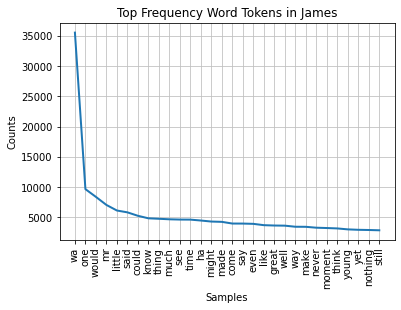

In [ ]:
#Analyses of Realism : James/Howells (Realism),
# VS Modernism :  Barnes/Hemingway (Modernism)

urls = james_urls


#for url in urls:
#    processed_text = process_url(url)

processed_texts = []
for url in urls:
    processed_text = process_url(url)
    processed_texts.append(processed_text)
    #print(len(processed_text))

unified_processed_text = [word for sublist in processed_texts for word in sublist]


#This is to process each group of urls for each author
stopwords = nltk.corpus.stopwords.words("english") 
unified_processed_text = [word for sublist in processed_texts for word in sublist]

unified_processed_text = [word for word in unified_processed_text  #This lists the most used words that are not in the stopwords list
                          if word[0].isalpha() and word not in stopwords]
unified_processed_textFrequencies = nltk.FreqDist(unified_processed_text)
unified_processed_textFrequencies.tabulate(20) # show a sample of the top 

print("number of types: ", len(unified_processed_textFrequencies))
print("number of tokens: ", len(unified_processed_text))
print("type/token ratio: ", len(unified_processed_textFrequencies)/len(unified_processed_text))

print("Here are the 10 first hapaxes:", nltk.FreqDist(unified_processed_text).hapaxes()[0:10])



#This is the visual representation through graph of the most used words 
# make sure that graphs are embedded into our notebook output
%matplotlib inline

# plot the top frequency words in a graph
unified_processed_textFrequencies.plot(30, title="Top Frequency Word Tokens in James")

    wa   said     mr  would  could    one   dont   know   well   like  think   time    see     go    say  thing little    man   come   much 
 21576   9580   7666   6338   6076   5366   4950   4839   4414   3822   3785   3610   3471   3351   3201   3132   3107   2997   2973   2877 
number of types:  37297
number of tokens:  861001
type/token ratio:  0.04331818429943751
Here are the 10 first hapaxes: ['garcia', 'eric', 'eldred', 'proofreader', 'nominee', 'doctrinaire', 'impoverishment', 'undreamed', 'manyverandaed', 'mullioned']


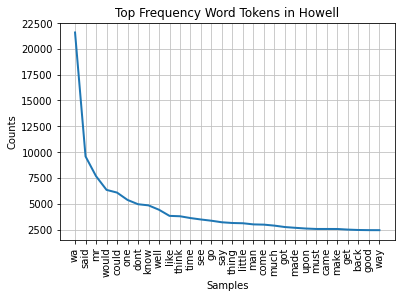

In [ ]:
#Analyses of Realism : James/Howells/Crane/Twain (Realism),
# VS Modernism :  Faulkner/Hemingway (Modernism)

urls = howell_urls


#for url in urls:
#    processed_text = process_url(url)

processed_texts = []
for url in urls:
    processed_text = process_url(url)
    processed_texts.append(processed_text)
    #print(len(processed_text))

unified_processed_text = [word for sublist in processed_texts for word in sublist]


#This is to process each group of urls for each author
stopwords = nltk.corpus.stopwords.words("english") 
unified_processed_text = [word for sublist in processed_texts for word in sublist]

unified_processed_text = [word for word in unified_processed_text  #This lists the most used words that are not in the stopwords list
                          if word[0].isalpha() and word not in stopwords]
unified_processed_textFrequencies = nltk.FreqDist(unified_processed_text)
unified_processed_textFrequencies.tabulate(20) # show a sample of the top 

print("number of types: ", len(unified_processed_textFrequencies))
print("number of tokens: ", len(unified_processed_text))
print("type/token ratio: ", len(unified_processed_textFrequencies)/len(unified_processed_text))

print("Here are the 10 first hapaxes:", nltk.FreqDist(unified_processed_text).hapaxes()[0:10])

#This is the visual representation through graph of the most used words 
# make sure that graphs are embedded into our notebook output
%matplotlib inline

# plot the top frequency words in a graph
unified_processed_textFrequencies.plot(30, title="Top Frequency Word Tokens in Howell")

       wa       one     would      said      like    little      hand something      know     could       eye     never     thing       say       see     woman      back      time       man      come 
      544       194       188       174       136       134       116       107       107        93        92        92        80        79        75        74        73        72        68        67 
number of types:  5403
number of tokens:  20459
type/token ratio:  0.2640891539175913
Here are the 10 first hapaxes: ['restriction', 'whatsoever', 'reuse', 'license', 'included', 'wwwgutenbergorg', 'youll', 'check', 'title', 'author']


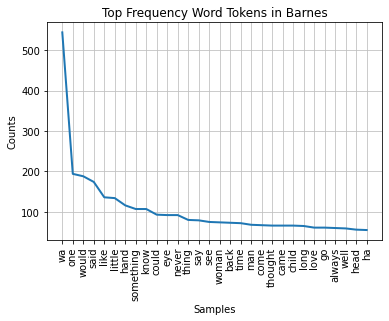

In [ ]:
#Analyses of Realism : James/Howells (Realism),
# VS Modernism :  Barnes/Hemingway (Modernism)

urls = barnes_urls


#for url in urls:
#    processed_text = process_url(url)

processed_texts = []
for url in urls:
    processed_text = process_url(url)
    processed_texts.append(processed_text)
    #print(len(processed_text))

unified_processed_text = [word for sublist in processed_texts for word in sublist]


#This is to process each group of urls for each author
stopwords = nltk.corpus.stopwords.words("english") 
unified_processed_text = [word for sublist in processed_texts for word in sublist]

unified_processed_text = [word for word in unified_processed_text  #This lists the most used words that are not in the stopwords list
                          if word[0].isalpha() and word not in stopwords]
unified_processed_textFrequencies = nltk.FreqDist(unified_processed_text)
unified_processed_textFrequencies.tabulate(20) # show a sample of the top 

print("number of types: ", len(unified_processed_textFrequencies))
print("number of tokens: ", len(unified_processed_text))
print("type/token ratio: ", len(unified_processed_textFrequencies)/len(unified_processed_text))

print("Here are the 10 first hapaxes:", nltk.FreqDist(unified_processed_text).hapaxes()[0:10])

#This is the visual representation through graph of the most used words 
# make sure that graphs are embedded into our notebook output
%matplotlib inline

# plot the top frequency words in a graph
unified_processed_textFrequencies.plot(30, title="Top Frequency Word Tokens in Barnes")

   wa  said  went   one brett    go  back  bull  like   get  came  good  bill   got  know   say going  come would right 
 2025  1753   481   460   432   420   415   410   386   386   363   355   354   351   349   332   325   305   299   298 
number of types:  6419
number of tokens:  60797
type/token ratio:  0.10558086747701367
Here are the 10 first hapaxes: ['akrigg', 'cindy', 'beyer', 'meehan', 'torrent', 'walsh', 'ethel', 'moorhead', 'doubleday', 'macaulay']


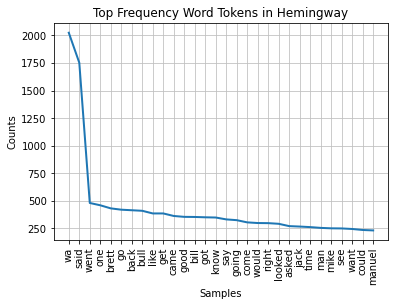

In [ ]:
#Analyses of Realism : James/Howells (Realism),
# VS Modernism :  Faulkner/Hemingway (Modernism)

urls = hemingway_urls

#for url in urls:
#    processed_text = process_url(url)

processed_texts = []
for url in urls:
    processed_text = process_url(url)
    processed_texts.append(processed_text)
    #print(len(processed_text))

unified_processed_text = [word for sublist in processed_texts for word in sublist]


#This is to process each group of urls for each author
stopwords = nltk.corpus.stopwords.words("english") 
unified_processed_text = [word for sublist in processed_texts for word in sublist]

unified_processed_text = [word for word in unified_processed_text  #This lists the most used words that are not in the stopwords list
                          if word[0].isalpha() and word not in stopwords]
unified_processed_textFrequencies = nltk.FreqDist(unified_processed_text)
unified_processed_textFrequencies.tabulate(20) # show a sample of the top 

print("number of types: ", len(unified_processed_textFrequencies))
print("number of tokens: ", len(unified_processed_text))
print("type/token ratio: ", len(unified_processed_textFrequencies)/len(unified_processed_text))


print("Here are the 10 first hapaxes:", nltk.FreqDist(unified_processed_text).hapaxes()[0:10])


#This is the visual representation through graph of the most used words 
# make sure that graphs are embedded into our notebook output
%matplotlib inline

# plot the top frequency words in a graph
unified_processed_textFrequencies.plot(30, title="Top Frequency Word Tokens in Hemingway")